# ★ Interpolation ★

In [89]:
# Import modules
import sys
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg

# 3.1 Data And Interpolating Functions

## Newton's divided differences

In [34]:
def newton_divided_diff(X, Y, n):
    V = {}
    for j in range(n):
        V[j, 0] = Y[j]
    
    for i in range(1,n):
        for j in range(n-i):
            V[j, i] = (V[j+1, i-1] - V[j, i-1]) / (X[j+i] - X[j])
    
    C = []
    for i in range(n):
        C.append(V[0,i])
    
    return C

### Example 
Use Newton's divided differences to find the interpolating polynomial passing through (0,2),(1,1),(2,0),(3,-1)

In [35]:
X = [0, 1, 2, 3]
Y = [2, 1, 0, -1]
C = newton_divided_diff(X, Y, 4)
print(C)

[2, -1.0, 0.0, 0.0]


$$
P(x) = 2 + (-1)(x - 0) = 2 - x
$$

# 3.4 Cubic Splines

## Natural cubic spline

In [83]:
def natural_cubic_spline(X, Y):
    A = np.zeros(X.size - 1, dtype=float)
    for i in range(X.size - 1):
        A[i] = Y[i]
    delta = np.zeros(X.size - 1, dtype=float)
    Delta = np.zeros(X.size - 1, dtype=float)
    for i in range(1, X.size):
        delta[i - 1] = X[i] - X[i - 1]
        Delta[i - 1] = Y[i] - Y[i - 1]
        
    Mat = np.zeros(X.size * X.size, dtype=float).reshape(X.size, X.size)
    Mat[0][0] = Mat[X.size - 1][X.size - 1] = 1.0
    for i in range(1, X.size - 1):
        Mat[i][i] = 2 * (delta[i - 1] + delta[i]) #diagonal
        Mat[i][i - 1] = delta[i - 1]
        Mat[i][i + 1] = delta[i]
        
    b = np.zeros(X.size, dtype=float)
    for i in range(1,X.size - 1):
        b[i] = 3 * (Delta[i]/delta[i] - Delta[i - 1]/delta[i - 1])
    
    # Solve the equations systems
    lu, piv = linalg.lu_factor(Mat)
    C = linalg.lu_solve([lu, piv], b)
    
    D = np.zeros(X.size - 1, dtype=float)
    B = np.zeros(X.size - 1, dtype=float)
    
    for i in range(1, X.size):
        D[i - 1] = (C[i] - C[i - 1]) / (3 * delta[i - 1])
        B[i - 1] = Delta[i - 1] / delta[i - 1] - delta[i - 1] * (2 * C[i - 1] + C[i]) / 3
        
    return A, B, C, D

### Example
Find the natural cubic spline through (0,3),(1,-2),(2,1)

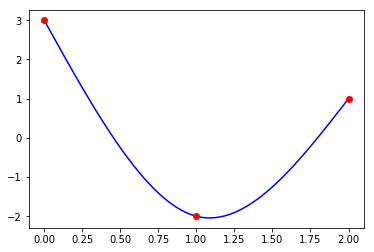

In [126]:
X = np.array([0, 1, 2])
Y = np.array([3, -2, 1])
A, B, C, D = natural_cubic_spline(X, Y)
S = lambda x, i : A[i] + B[i] * (x - X[i]) + C[i] * pow(x - X[i], 2) + D[i] * pow(x - X[i], 3)
total = 200
pX = np.linspace(0,2,total)
pY = np.zeros(total)
for i in range(pX.size):
    x = pX[i]
    for j in range(X.size - 1):
        if x <= X[j + 1]:
            pY[i] = S(x, j)
            break
        else:
            continue
    
plt.plot(pX,pY,color='b')
plt.plot(X,Y,'ro')
plt.show()

### Example
Cubic splines with six points (0,3),(1,1),(2,4),(3,1),(4,2),(5,0)

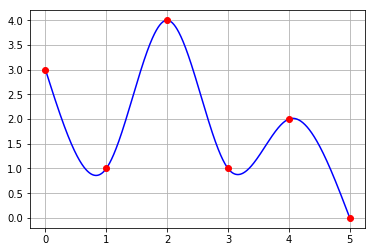

In [129]:
X = np.array([0, 1, 2, 3, 4, 5])
Y = np.array([3, 1, 4, 1, 2, 0])
A, B, C, D = natural_cubic_spline(X, Y)
S = lambda x, i : A[i] + B[i] * (x - X[i]) + C[i] * pow(x - X[i], 2) + D[i] * pow(x - X[i], 3)
total = 1000
pX = np.linspace(0,5,total)
pY = np.zeros(total)
for i in range(pX.size):
    x = pX[i]
    for j in range(X.size - 1):
        if x <= X[j + 1]:
            pY[i] = S(x, j)
            break
        else:
            continue
    
plt.plot(pX,pY,color='b')
plt.plot(X,Y,'ro')
plt.grid(True)
plt.show()